In [7]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
RPS_EXPERTS = ['ROCK', 'PAPER', 'SCISSORS']

RPS_REWARD_VECTORS = {
    'ROCK':     np.asarray([0, 1, -1]),  # opponent playing ROCK
    'PAPER':    np.asarray([-1, 0, 1]),  # opponent playing PAPER
    'SCISSORS': np.asarray([1, -1, 0]),  # opponent playing PAPER
}

In [3]:
class RPSPlayer:
    def __init__(self, experts):
        self.sum_p = np.full(3, 0.)
        # total game number
        self.games_played = 0
        # number of experts
        self.n = len(experts)
        # experts list
        self.experts = experts
        # cumulative expected reward for our Regret Matching algorithm
        self.expected_reward = 0.
        # cumulative expected rewards for experts
        self.experts_rewards = np.zeros(self.n)
        # cumulative regrets towards experts
        self.regrets = np.zeros(self.n)
        # probability disribution over experts to draw decision from
        self.p = np.full(self.n, 1. / self.n)

    def move(self):
        action = np.random.choice(self.experts, 1,  p=self.p)
        return action[0]
    
    def update_rule(self, rewards_vector):
        self.expected_reward += np.dot(self.p, rewards_vector)
        self.experts_rewards += rewards_vector
        self.regrets = self.experts_rewards - self.expected_reward
        self._update_p()
        
    def _update_p(self):
        sum_w = np.sum([self._w(i) for i in np.arange(self.n)])
        if sum_w <= 0:
            self.p = np.full(self.n, 1. / self.n)
        else:
            self.p = np.asarray(
                [self._w(i) / sum_w for i in np.arange(self.n)]
            )

    def _w(self, i):
        return max(0, self.regrets[i])

    def learn_from(self, opponent_move):
        reward_vector = RPS_REWARD_VECTORS[opponent_move]
        self.update_rule(reward_vector)
        self.games_played += 1
        self.sum_p += self.p

    def current_best_response(self):
        return np.round(self.sum_p / self.games_played, 4)

    def eps(self):
        return np.max(self.regrets / self.games_played)

In [28]:
eps = []
a_rock_p = []
a_paper_p = []
a_scissors_p = []
b_rock_p = []
b_paper_p = []
b_scissors_p = []


a = RPSPlayer(RPS_EXPERTS)
b = RPSPlayer(RPS_EXPERTS)
t = 1000
for i in range(0, t):
    a_move = a.move()
    b_move = b.move()
    a.learn_from(b_move)
    b.learn_from(a_move)

    if i % 10 == 0:
        _2e = np.round(2 * np.max([a.eps(), b.eps()]), 3)
        a_ne = a.current_best_response()
        b_ne = b.current_best_response()
        print("step {} eps {} - nash equilibrium for RPS: {} ,{}".format(i, _2e, a_ne, b_ne), end='\r')
        
        eps.append(_2e)
        a_rock_p.append(a_ne[0])
        a_paper_p.append(a_ne[1])
        a_scissors_p.append(a_ne[2])
        b_rock_p.append(b_ne[0])
        b_paper_p.append(b_ne[1])
        b_scissors_p.append(b_ne[2])

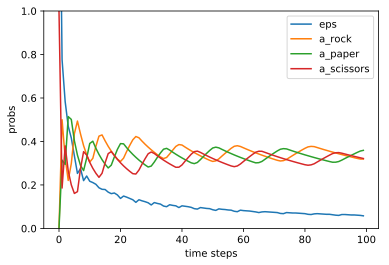

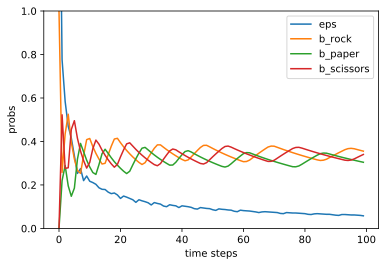

In [29]:
plt.plot(eps, label='eps')
plt.plot(a_rock_p, label='a_rock')
plt.plot(a_paper_p, label='a_paper')
plt.plot(a_scissors_p, label='a_scissors')
plt.legend()
plt.xlabel('time steps')
plt.ylabel('probs')
plt.ylim(0, 1)
plt.show()

plt.plot(eps, label='eps')
plt.plot(b_rock_p, label='b_rock')
plt.plot(b_paper_p, label='b_paper')
plt.plot(b_scissors_p, label='b_scissors')
plt.legend()
plt.xlabel('time steps')
plt.ylabel('probs')
plt.ylim(0, 1)
plt.show()